<a href="https://colab.research.google.com/github/GOURIIMITTAL/UrbanClassifier/blob/main/UrbanClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
!pip install resampy
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
#import kagglehub

#path = kagglehub.dataset_download("chrisfilo/urbansound8k")
#metadata = pd.read_csv(os.path.join(path, 'UrbanSound8K.csv'))

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

audio_data_path = '/content/drive/MyDrive/archive/audio/'
metadata_path = '/content/drive/MyDrive/archive/UrbanSound8K.csv'

df=pd.read_csv(metadata_path)
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


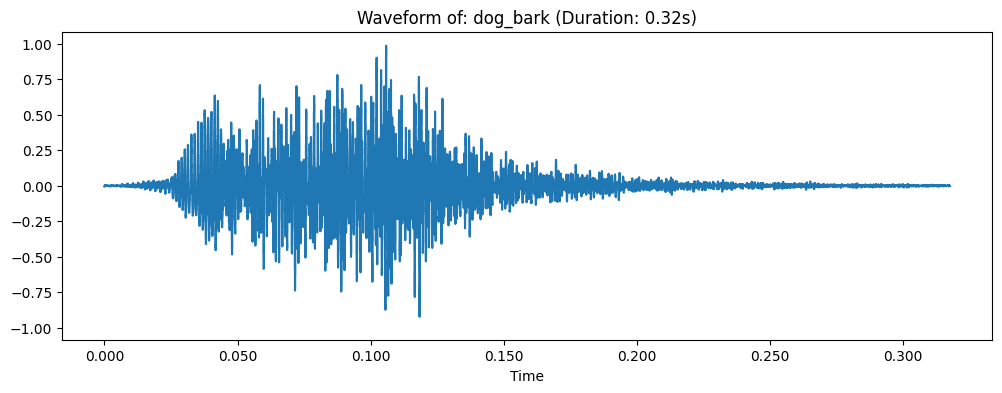

In [5]:

metadata = pd.read_csv(metadata_path)

# Get the first audio file path from the metadata
sample_file = metadata.iloc[0]

# --- This step is crucial for cross-platform compatibility ---
# We use os.path.join to build the full path: base_folder/fold_number/filename.wav
file_name = os.path.join(
    audio_data_path,
    'fold' + str(sample_file['fold']),
    sample_file['slice_file_name']
)

# Load the audio using librosa:
# y is the audio signal (amplitude values)
# sr is the sampling rate (resampled to 22050 Hz for consistency)
y, sr = librosa.load(file_name, sr=22050)

# Plot the waveform to visualize the sound
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of: {sample_file['class']} (Duration: {len(y)/sr:.2f}s)")
plt.show()

In [6]:
def extract_features(file_name, n_mfcc=40):
    try:
        # Load audio, resampling to a standard rate (res_type='kaiser_fast' is for quality)
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

        # 1. Extract the MFCCs
        # n_mfcc=40 means we calculate 40 coefficients per short time frame.
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

        # 2. Transpose and Calculate the MEAN (Crucial for ANN)
        # We take the average of the 40 coefficients across all time steps.
        # This converts the 2D time-series into a single 1D vector (40 numbers).
        mfccs_processed = np.mean(mfccs.T, axis=0)

    except Exception as e:
        print(f"Error encountered while processing file: {file_name}. Error: {e}")
        return None

    return mfccs_processed

In [7]:
extract_features(
    "/content/drive/MyDrive/archive/audio/fold5/100032-3-0-0.wav"
)

array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
        -21.19913   ,  -22.677624  ,  -10.855971  ,   18.294256  ,
          6.6527033 ,   14.324025  ,  -12.167682  ,    2.276837  ,
        -17.779192  ,   10.388951  ,   -6.5828357 ,   -0.69445676,
        -18.336023  ,    1.994253  ,   -5.143332  ,    8.3024    ,
        -12.645056  ,   -6.5297318 ,    4.617667  ,   -2.1799169 ,
         -6.662824  ,    0.35971096,   -3.9084103 ,    4.7756243 ,
         -6.3845215 ,   -5.3798175 ,    0.9159778 ,    6.970493  ,
         -0.24866785,    1.6782194 ,   -5.6111803 ,   -2.9643462 ,
          3.1490579 ,   -1.6930531 ,   -0.61698425,    0.38600534],
      dtype=float32)

In [9]:
# Create an empty list to store the extracted features
all_features = []

print("Starting feature extraction. This will take a while...")
# Loop through each row in the metadata DataFrame
for index, row in metadata.iterrows():

    # Construct the full file path using the metadata columns and os.path.join
    file_name = os.path.join(
        audio_data_path,
        'fold' + str(row["fold"]),
        row["slice_file_name"]
    )

    # Get the class label (the sound type)
    class_label = row["class"]

    # Call the feature extraction function
    data = extract_features(file_name)

    # If feature extraction was successful, append the data
    if data is not None:
        # data is the 40-element MFCC array
        all_features.append([data, class_label, row["fold"]])

    # Optional: Print progress every 500 files
    if (index + 1) % 500 == 0:
        print(f"Processed {index + 1} files...")

# Convert the list of features into a final pandas DataFrame
features_df = pd.DataFrame(all_features, columns=['feature', 'class', 'fold'])

print("\n--- Feature Extraction Complete ---")
print("Features DataFrame Head:")
print(features_df.head())

Starting feature extraction. This will take a while...
Processed 500 files...
Processed 1000 files...
Processed 1500 files...
Processed 2000 files...
Processed 2500 files...
Processed 3000 files...
Processed 3500 files...


/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


Processed 4000 files...
Processed 4500 files...
Processed 5000 files...
Processed 5500 files...
Processed 6000 files...
Processed 6500 files...
Processed 7000 files...
Processed 7500 files...
Processed 8000 files...


/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


Processed 8500 files...

--- Feature Extraction Complete ---
Features DataFrame Head:
                                             feature             class  fold
0  [-217.35526, 70.22338, -130.38527, -53.282898,...          dog_bark     5
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing     5
2  [-458.79114, 121.38419, -46.520657, 52.00812, ...  children_playing     5
3  [-413.89984, 101.66371, -35.42945, 53.036354, ...  children_playing     5
4  [-446.60352, 113.68541, -52.402214, 60.302044,...  children_playing     5


In [11]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 1. Separate Features and Labels (Same as before)
X = np.array(features_df['feature'].tolist())
y = np.array(features_df['class'].tolist())

# 2. Split the data FIRST (80% Train, 20% Test)
# It's important to split before scaling to prevent "data leakage"
X_train, X_test, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. FEATURE SCALING (The New Part!)
# We calculate the scale on the training data and apply it to both
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Encoding Labels (Same as before)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_labels)
y_test_encoded = le.transform(y_test_labels)
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

print("Data is now Split, Scaled, and Encoded!")

Data is now Split, Scaled, and Encoded!


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

# 1. Define the number of classes (UrbanSound8K has 10)
num_labels = y_train.shape[1]

model = Sequential()

### Layer 1: Input Layer (40 features -> 256 neurons)
model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3)) # Helps prevent overfitting

### Layer 2: Hidden Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

### Layer 3: Hidden Layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

### Layer 4: Output Layer (10 neurons for 10 classes)
model.add(Dense(num_labels))
model.add(Activation('softmax')) # Softmax gives us probabilities (0 to 1)

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,978 (1.05 MB)

 Trainable params: 275,978 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Setup Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and save the history for plotting
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1)

# Save your final model
model.save('best_urban_sound_model.h5')

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3859 - loss: 1.7416 - val_accuracy: 0.6629 - val_loss: 1.0055
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6595 - loss: 1.0080 - val_accuracy: 0.7802 - val_loss: 0.6904
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7407 - loss: 0.7745 - val_accuracy: 0.8100 - val_loss: 0.5954
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7865 - loss: 0.6296 - val_accuracy: 0.8420 - val_loss: 0.4959
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8076 - loss: 0.5675 - val_accuracy: 0.8661 - val_loss: 0.4263
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8358 - loss: 0.4859 - val_accuracy: 0.8775 - val_loss: 0.4045
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8559 - loss: 0.4373 - val_accuracy: 0.8798 - val_loss: 0.3623
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8723 - loss: 0.3667 - val_ac

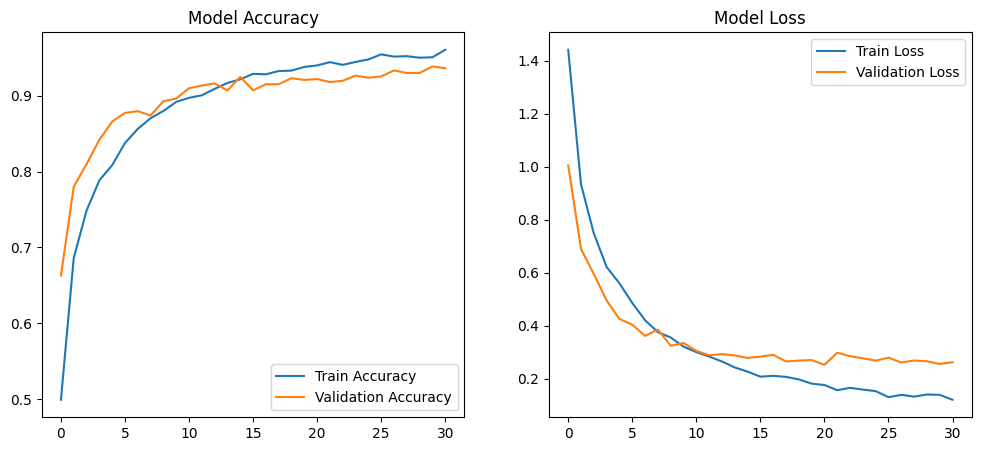

In [15]:
import matplotlib.pyplot as plt

# 1. Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Accuracy: 92.22%
